In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

In [2]:
cleaned_df = pd.read_csv("Resources//Data//homerent_cleaneddata_zip.csv", index_col= "Date", parse_dates=True)

# Home_price.Newyork=np.ceil(Home_price.Newyork).astype(int)

df = cleaned_df
df

,77449,77494,11385,77084,11109
Date,,,,,
2015-03-31,1274.0,1583.0,2201.0,1216.0,2715.0
2015-04-30,1289.0,1578.0,2238.0,1213.0,2812.0
2015-05-31,1294.0,1583.0,2271.0,1214.0,2880.0
2015-06-30,1297.0,1581.0,2318.0,1222.0,2887.0
2015-07-31,1298.0,1582.0,2334.0,1215.0,2852.0
...,...,...,...,...,...
2022-07-31,1799.0,1968.0,3005.0,1680.0,3947.0
2022-08-31,1835.0,1973.0,3063.0,1661.0,3956.0
2022-09-30,1836.0,1987.0,3064.0,1641.0,4009.0


<AxesSubplot:xlabel='Date'>

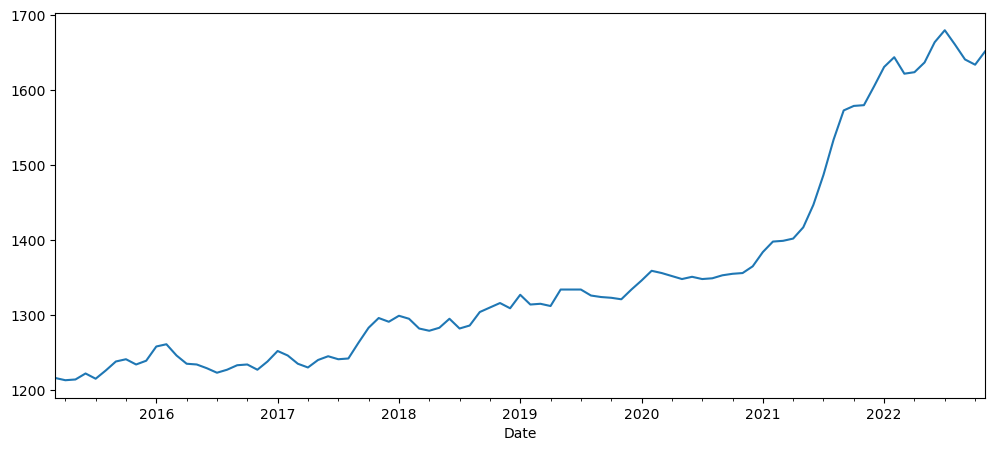

In [3]:
# cleaned_df1 = cleaned_df[[ "91940"]].copy()
df["77084"].plot(figsize=(12,5))

In [4]:
# Checking for satisonarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag  = "AIC")
    print("1. ADF :",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Observations  used for ADF Regression and Critical Values Calulation :", dftest[3])
    print("5. Critical values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)


In [5]:
ad_test(df["77084"])

1. ADF : 0.6655879614592831
2. P-Value :  0.9891254950699833
3. Num of Lags :  12
4. Num of Observations  used for ADF Regression and Critical Values Calulation : 80
5. Critical values :
	 1% :  -3.5148692050781247
	 5% :  -2.8984085156250003
	 10% :  -2.58643890625


In [6]:
from pmdarima import auto_arima
# Ignore harmless warnings 
import warnings
warnings.filterwarnings("ignore")

In [7]:
stepwise_fit = auto_arima(cleaned_df["11385"], trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=870.535, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=878.482, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=870.798, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=874.223, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=886.434, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=868.939, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=865.715, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=852.415, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=852.366, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=847.147, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=848.884, Time=0.22 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   93
Model:               SARIMAX(1, 1, 4)   Log Likelihood                -416.574
Date:                Mon, 16 Jan 2023   AIC                            847.147
Time:                        21:12:05   BIC                            864.800
Sample:                    03-31-2015   HQIC                           854.272
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5158      3.873      1.166      0.244      -3.076      12.107
ar.L1          0.4784      0.331      1.444      0.149      -0.171       1.128
ma.L1         -0.1292      0.291     -0.445      0.657      -0.699       0.441
ma.L2          0.4153      0.185      2.241      0.025       0.052       0.778
ma.L3         -0.5357      0.188     -2.846      0.004      -0.905      -0.167
ma.L4          0.5052      0.138      3.663      0.000       0.235       0.775
sigma2       480.4792     72.912      6.590      0.000     337.574     623.384
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.85   Prob(JB):                         0.93
Heteroskedasticity (H):               1.03   Skew:                            -0.02
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
stepwise_fit.get_params()["order"]

(1, 1, 4)

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [10]:
print(df.shape)
train=df.iloc[:-20]
test=df.iloc[-20:]
print(train.shape,test.shape)

(93, 5)
(73, 5) (20, 5)


In [11]:
model=SARIMAX(train["77084"],order=(3,2,1), seasonal_order=(1,1,0,12))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               77084   No. Observations:                   73
Model:             SARIMAX(3, 2, 1)x(1, 1, [], 12)   Log Likelihood                -211.550
Date:                             Mon, 16 Jan 2023   AIC                            435.099
Time:                                     21:12:05   BIC                            447.564
Sample:                                 03-31-2015   HQIC                           439.965
                                      - 03-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1357      0.133      1.021      0.307      -0.125       0.396
ar.L2          0.2075      0.123      1.690      0.091      -0.033       0.448
ar.L3         -0.4139      0.126     -3.285      0.001      -0.661      -0.167
ma.L1         -0.9998     20.240     -0.049      0.961     -40.670      38.671
ar.S.L12      -0.4395      0.143     -3.068      0.002      -0.720      -0.159
sigma2        66.5314   1345.568      0.049      0.961   -2570.733    2703.796
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.86   Prob(JB):                         0.15
Heteroskedasticity (H):               1.19   Skew:                            -0.51
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type="levels")
#print(pred)
pred.index=df.index[start:end+1] # To set the date value as an index
print(pred) 

Date
2021-04-30    1397.239687
2021-05-31    1400.955784
2021-06-30    1402.302055
2021-07-31    1399.782581
2021-08-31    1398.902680
2021-09-30    1401.234604
2021-10-31    1403.547925
2021-11-30    1403.515309
2021-12-31    1414.972547
2022-01-31    1431.097245
2022-02-28    1445.434500
2022-03-31    1445.256938
2022-04-30    1443.391533
2022-05-31    1444.357116
2022-06-30    1447.182156
2022-07-31    1445.045291
2022-08-31    1445.685713
2022-09-30    1449.379752
2022-10-31    1452.261678
2022-11-30    1453.344768
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

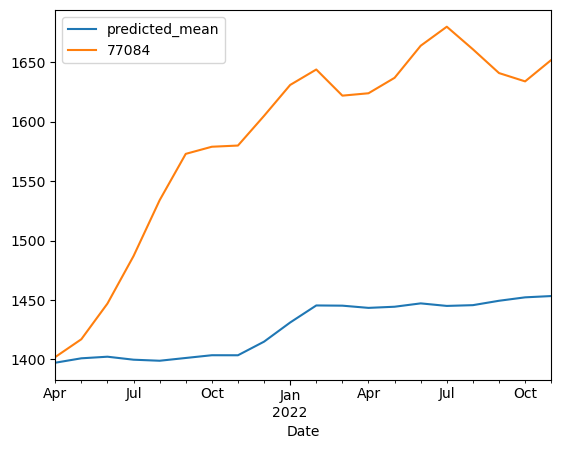

In [13]:
# print the prediction 
pred.plot(legend=True)
test["77084"].plot(legend=True)

In [14]:
test["77084"].mean()

1585.7

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test["77084"]))
print(rmse)

172.3112533527035


In [16]:
# Setting the whole dataset for trainning and looking for the end dates 
model2=SARIMAX(df["77084"],order=(0,2,0),seasonal_order=(1,1,0,12))
model2=model2.fit()
df.tail()

,77449,77494,11385,77084,11109
Date,,,,,
2022-07-31,1799.0,1968.0,3005.0,1680.0,3947.0
2022-08-31,1835.0,1973.0,3063.0,1661.0,3956.0
2022-09-30,1836.0,1987.0,3064.0,1641.0,4009.0
2022-10-31,1823.0,1974.0,3071.0,1634.0,4021.0
2022-11-30,1795.0,1963.0,3073.0,1652.0,4055.0


In [17]:
# To set date range if not appears
#index_future_dates= pd.date_range(start="2022-12-31", end="2025-06-30")
# printing values for future date 
pred = model2.predict(start=len(df),end=len(df)+30,type="levels").rename("SARIMA PREDICTION")
#pred = model2.predict(start=start,end=end+10,type="levels").rename("SARIMA PREDICTION")
#pred.index=index_future_dates
print(pred)

2022-12-31    1685.883831
2023-01-31    1725.333007
2023-02-28    1755.840267
2023-03-31    1762.507261
2023-04-30    1782.014521
2023-05-31    1813.029042
2023-06-30    1858.550824
2023-07-31    1903.725078
2023-08-31    1935.204276
2023-09-30    1962.132651
2023-10-31    1978.727038
2023-11-30    2005.103608
2023-12-31    2051.481022
2024-01-31    2101.107961
2024-02-29    2139.734479
2024-03-31    2148.859836
2024-04-30    2176.486354
2024-05-31    2215.362818
2024-06-30    2268.489230
2024-07-31    2315.864535
2024-08-31    2338.737626
2024-09-30    2358.861086
2024-10-31    2380.486971
2024-11-30    2419.614437
2024-12-31    2476.654348
2025-01-31    2538.118509
2025-02-28    2589.626448
2025-03-31    2614.504774
2025-04-30    2655.012713
2025-05-31    2706.901123
2025-06-30    2773.170006
Freq: M, Name: SARIMA PREDICTION, dtype: float64


<AxesSubplot:>

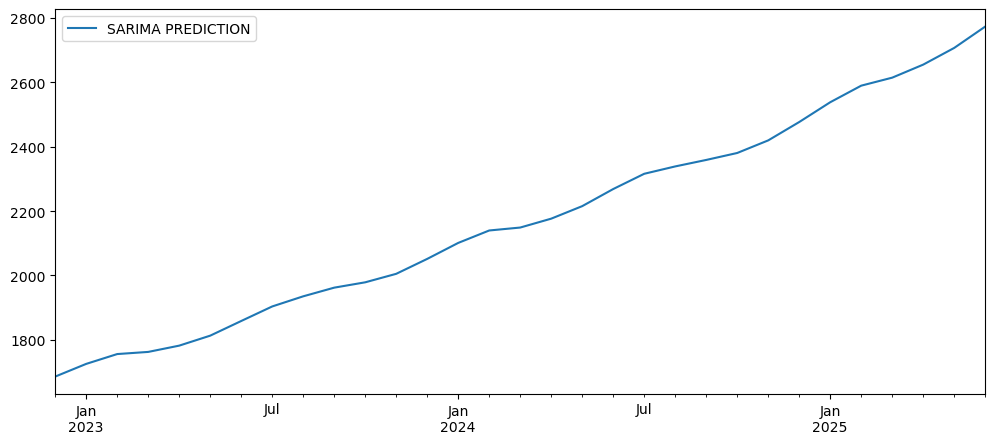

In [18]:
# Prnting the future prediction 
pred.plot(figsize=(12,5), legend=True)

## Auto Training for multiple Zip codes.


In [19]:
# List_Zip = ["77449","77494","11385","77084","11109"]
list_zip = df.columns

In [20]:
print(list_zip)

Index(['77449', '77494', '11385', '77084', '11109'], dtype='object')


In [21]:
df[list_zip[1]]

Date
2015-03-31    1583.0
2015-04-30    1578.0
2015-05-31    1583.0
2015-06-30    1581.0
2015-07-31    1582.0
               ...  
2022-07-31    1968.0
2022-08-31    1973.0
2022-09-30    1987.0
2022-10-31    1974.0
2022-11-30    1963.0
Name: 77494, Length: 93, dtype: float64

In [22]:
train_data = {}
test_data = {}
models = {}
for zip_code in list_zip:
    data = df[zip_code]
    train=data.iloc[:-20]
    test=data.iloc[-20:]
    stepwise_fit = auto_arima(data, trace=True,supress_warnings=True)
    best_order = stepwise_fit.get_params()["order"]
    model=SARIMAX(train,order = best_order, seasonal_order=(1,1,0,12))
    model=model.fit()
    models[zip_code] = model
    train_data[zip_code] = train
    test_data[zip_code] = test

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=700.102, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=700.597, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=700.231, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=687.874, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=687.982, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=689.246, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=691.598, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=702.590, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.722 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=678.526, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=717.578, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=705.434, Time=0.03 sec


In [23]:

#models["77494"]
train_data

{'77449': Date
 2015-03-31    1274.0
 2015-04-30    1289.0
 2015-05-31    1294.0
 2015-06-30    1297.0
 2015-07-31    1298.0
                ...  
 2020-11-30    1451.0
 2020-12-31    1476.0
 2021-01-31    1491.0
 2021-02-28    1500.0
 2021-03-31    1510.0
 Name: 77449, Length: 73, dtype: float64,
 '77494': Date
 2015-03-31    1583.0
 2015-04-30    1578.0
 2015-05-31    1583.0
 2015-06-30    1581.0
 2015-07-31    1582.0
                ...  
 2020-11-30    1640.0
 2020-12-31    1640.0
 2021-01-31    1646.0
 2021-02-28    1633.0
 2021-03-31    1625.0
 Name: 77494, Length: 73, dtype: float64,
 '11385': Date
 2015-03-31    2201.0
 2015-04-30    2238.0
 2015-05-31    2271.0
 2015-06-30    2318.0
 2015-07-31    2334.0
                ...  
 2020-11-30    2437.0
 2020-12-31    2431.0
 2021-01-31    2450.0
 2021-02-28    2450.0
 2021-03-31    2418.0
 Name: 11385, Length: 73, dtype: float64,
 '77084': Date
 2015-03-31    1216.0
 2015-04-30    1213.0
 2015-05-31    1214.0
 2015-06-30    1222.0


In [25]:
print(train_data["77084"])

Date
2015-03-31    1216.0
2015-04-30    1213.0
2015-05-31    1214.0
2015-06-30    1222.0
2015-07-31    1215.0
               ...  
2020-11-30    1356.0
2020-12-31    1365.0
2021-01-31    1384.0
2021-02-28    1398.0
2021-03-31    1399.0
Name: 77084, Length: 73, dtype: float64


In [26]:
inputzip_code = "77084"
start=len (train_data[inputzip_code])
end=len(train_data[inputzip_code])+len(test_data[inputzip_code])-1
pred=models[inputzip_code].predict(start=start,end=end,type="levels")
#print(pred)
pred.index=df.index[start:end+1] # To set the date value as an index

In [27]:
print(pred)

Date
2021-04-30    1397.116122
2021-05-31    1398.314086
2021-06-30    1399.214323
2021-07-31    1398.030356
2021-08-31    1394.856556
2021-09-30    1396.834325
2021-10-31    1397.174367
2021-11-30    1397.344376
2021-12-31    1407.605580
2022-01-31    1424.091027
2022-02-28    1437.331011
2022-03-31    1437.016359
2022-04-30    1433.946180
2022-05-31    1433.305030
2022-06-30    1434.783912
2022-07-31    1433.124193
2022-08-31    1431.409677
2022-09-30    1434.465555
2022-10-31    1435.254829
2022-11-30    1435.988966
Name: predicted_mean, dtype: float64


In [28]:
rmse=sqrt(mean_squared_error(pred,test_data[inputzip_code]))
print(rmse)

181.4836412486268


In [29]:
# Saving models using pickles
import pickle

In [30]:
for key, value in models.items():
    pickle.dump(value, open(f'Models/{key}.pkl', 'wb'))

In [31]:
models

{'77449': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1a62135b688>,
 '77494': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1a6232cd048>,
 '11385': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1a62337c948>,
 '77084': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1a6232cdc08>,
 '11109': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1a62337e088>}

In [32]:
pickled_model = pickle.load(open(f'Models/77449.pkl', 'rb'))

In [33]:
pred = pickled_model.predict(start=93,end=93+30,type="levels").rename("SARIMA PREDICTION")

In [34]:
print(pred)

2022-12-31    1784.702014
2023-01-31    1807.549055
2023-02-28    1825.959430
2023-03-31    1844.775911
2023-04-30    1863.166695
2023-05-31    1871.456432
2023-06-30    1886.206633
2023-07-31    1902.005267
2023-08-31    1925.772694
2023-09-30    1945.916752
2023-10-31    1965.294056
2023-11-30    1987.345070
2023-12-31    2016.087009
2024-01-31    2042.537415
2024-02-29    2066.036696
2024-03-31    2089.401959
2024-04-30    2111.039531
2024-05-31    2120.392383
2024-06-30    2138.572376
2024-07-31    2157.119904
2024-08-31    2187.353993
2024-09-30    2211.369367
2024-10-31    2235.800627
2024-11-30    2263.282088
2024-12-31    2299.097957
2025-01-31    2330.250509
2025-02-28    2357.538562
2025-03-31    2385.024411
2025-04-30    2411.584009
2025-05-31    2427.202007
2025-06-30    2450.191381
Freq: M, Name: SARIMA PREDICTION, dtype: float64


In [35]:
print(len(df))

93


In [38]:
df  = pd.DataFrame(pred)
df

,SARIMA PREDICTION
2022-12-31,1784.702014
2023-01-31,1807.549055
2023-02-28,1825.959430
2023-03-31,1844.775911
2023-04-30,1863.166695
2023-05-31,1871.456432
2023-06-30,1886.206633
2023-07-31,1902.005267
2023-08-31,1925.772694
2023-09-30,1945.916752
